In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [8]:
conexion = sqlite3.connect('punto_venta.db')
cursor=conexion.cursor()
cursor.execute("SELECT * FROM ventas")
ventas= cursor.fetchall() # Mostrar todos los registros e la tabla

In [9]:
ventas

[(5050, '2022-11-22', 44.0, 1, 'TDC', 1, 2122),
 (5051, '2022-11-22', 44.0, 1, 'TDC', 1, 2122),
 (5052, '2022-11-22', 44.0, 1, 'TDC', 1, 2122),
 (5053, '2022-11-22', 134.0, 2, 'Efectivo', 2, 2123),
 (5054, '2022-11-22', 67.0, 1, 'Efectivo', 2, 2123),
 (5055, '2022-11-22', 201.0, 3, 'Efectivo', 2, 2123),
 (5056, '2022-11-22', 48.0, 1, 'Trasferencia', 5, 2124),
 (5057, '2022-11-22', 96.0, 2, 'Trasferencia', 5, 2124),
 (5058, '2022-11-22', 144.0, 3, 'Trasferencia', 5, 2124),
 (5059, '2022-11-22', 192.0, 4, 'Trasferencia', 5, 2124),
 (5060, '2022-11-22', 240.0, 5, 'Trasferencia', 5, 2124)]

In [11]:
df = pd.read_sql_query(" SELECT id_venta,nombre,apellido_paterno,apellido_materno,monto,total_productos,forma_pago FROM clientes INNER JOIN ventas " 
                       +"ON clientes.id_cliente=ventas.id_cliente;",conexion)

In [12]:
df.head(10)

,id_venta,nombre,apellido_paterno,apellido_materno,monto,total_productos,forma_pago
0,5050,Carlos,Torres,Mejia,44.0,1,TDC
1,5051,Carlos,Torres,Mejia,44.0,1,TDC
2,5052,Carlos,Torres,Mejia,44.0,1,TDC
3,5053,Karla,Mondragon,Lopez,134.0,2,Efectivo
4,5054,Karla,Mondragon,Lopez,67.0,1,Efectivo
5,5055,Karla,Mondragon,Lopez,201.0,3,Efectivo
6,5056,Sofia,Perez,Gonzalez,48.0,1,Trasferencia
7,5057,Sofia,Perez,Gonzalez,96.0,2,Trasferencia
8,5058,Sofia,Perez,Gonzalez,144.0,3,Trasferencia
9,5059,Sofia,Perez,Gonzalez,192.0,4,Trasferencia


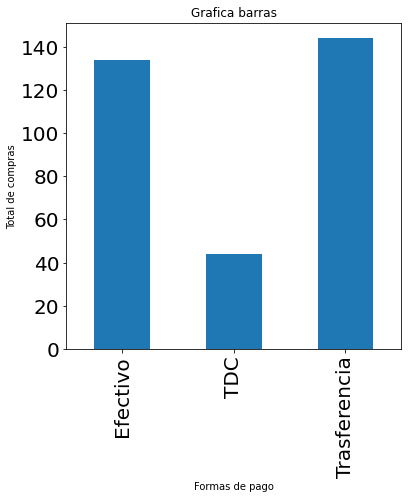

In [14]:
#Lee la consulta y lo pasa a un dataframe
pre = df.groupby('forma_pago').mean()["monto"].plot(kind='bar',
                fontsize=20,
                figsize=(6,6),
                title='Grafica barras',
                ylabel='Total de compras',
                xlabel='Formas de pago'
               )

In [16]:
#Explorar data frame
prod= pd.read_sql_query("SELECT nombre,stock_inv,precio FROM productos", conexion)
prod.head(10)

,nombre,stock_inv,precio
0,Agua,35,23.0
1,Jabon,78,67.0
2,Azucar,6,28.0
3,Leche,7,44.0
4,Cafe,8,48.0
5,Galletas,67,14.0
6,Frijoles,35,25.0
7,Atún,79,58.0
8,Salsa,120,36.0
9,Sopa,137,18.0


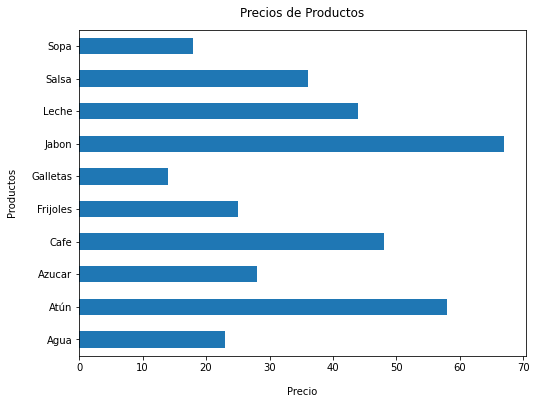

In [23]:
#Usanado un agrupador
prod.groupby('nombre').mean()["precio"].plot(kind='barh',figsize=(8,6))
plt.ylabel('Productos', labelpad=14)
plt.xlabel('Precio', labelpad=14)
plt.title('Precios de Productos', y=1.02);
               
                                            

In [24]:
ventas = pd.read_sql_query(" SELECT productos.nombre, stock_inv,monto,total_productos FROM ventas "
+" INNER JOIN productos ON productos.id_producto=ventas.id_producto;", conexion)

In [25]:
ventas.head(10)

,nombre,stock_inv,monto,total_productos
0,Agua,35,44.0,1
1,Agua,35,44.0,1
2,Agua,35,44.0,1
3,Jabon,78,134.0,2
4,Jabon,78,67.0,1
5,Jabon,78,201.0,3
6,Cafe,8,48.0,1
7,Cafe,8,96.0,2
8,Cafe,8,144.0,3
9,Cafe,8,192.0,4


In [26]:
conexion.close()